## Big Data ML AI 7 - José Manuel Guzmán Gutiérrez
# Práctica Final NLP
### Ejercicio 3 -  Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento

-------------

### Cargamos los datos (Repetimos los primeros pasos del anterior ejercicio)

In [1]:
import pandas as pd
import glob
import os

In [2]:
data_reviews = pd.read_json('./data/reviews_Grocery_and_Gourmet_Food_5.json.gz', lines=True, compression='gzip')

In [3]:
data_reviews[:100]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"
...,...,...,...,...,...,...,...,...,...
95,A1R19K6O4IAF5W,B0000CDEPD,Terry,"[2, 2]",Very good vanilla extract and organic too! Thi...,5,Much easier than making your own.,1365292800,"04 7, 2013"
96,AY8UH4COUYMGZ,B0000CDEPD,ttt,"[1, 2]","This bottle is a steal, at Whole Foods (at lea...",5,The Only Vanilla I'll Buy From Now On!,1373673600,"07 13, 2013"
97,A1RVOM92NT7WTM,B0000CDEPD,Vickie D.,"[0, 0]",Very good and even better knowing it is organi...,5,Added it to my subscribe,1398643200,"04 28, 2014"
98,A31EZQGRVKKYAZ,B0000CETGM,J. Hesse,"[1, 2]",Jamaica Blue Mountain Coffee is my absolute fa...,5,My favorite coffee,1369008000,"05 20, 2013"


In [4]:
data_reviews.shape

(151254, 9)

In [5]:
data_reviews = pd.DataFrame(data_reviews)

In [6]:
data_reviews.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

Contamos con 151254 registros para 9 columnas de información

Para nuestro análisis de sentimiento, vamos a catalogar los comentarios en base a las estrellas, por lo que nos quedaremos ahora solo con las columnas _**reviewText**_ y _**overall**_ .

In [7]:
data_reviews = data_reviews.drop(['reviewerID'], axis=1)
data_reviews = data_reviews.drop(['asin'], axis=1)
data_reviews = data_reviews.drop(['helpful'], axis=1)
data_reviews = data_reviews.drop(['unixReviewTime'], axis=1)
data_reviews = data_reviews.drop(['reviewTime'], axis=1)
data_reviews = data_reviews.drop(['reviewerName'], axis=1)
data_reviews = data_reviews.drop(['summary'], axis=1)

In [8]:
data_reviews.head()

,reviewText,overall
0,Just another flavor of Kit Kat but the taste i...,4
1,I bought this on impulse and it comes from Jap...,3
2,Really good. Great gift for any fan of green t...,4
3,"I had never had it before, was curious to see ...",5
4,I've been looking forward to trying these afte...,4


### Preprocesado

Vamos a generar un nuevo dataset con etiquetas de sentimiento y texto normalizado.

In [9]:
import unicodedata
from num2words import num2words

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def nltk_cleaner(text, tokenizer, sw_list, lemmatizer):
    sentences = list()
    for sentence in text:
        
        clean_text = []
        
        sentence = unicodedata.normalize('NFKD', sentence).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        for word in tokenizer.tokenize(sentence):

            if word not in sw_list:

                clean_word = lemmatizer.lemmatize(word).lower().strip()

                if clean_word.isdigit():
                    clean_word = num2words(clean_word, lang='en')

                clean_text.append(clean_word)
            clean_text_ = ' '.join([word for word in clean_text if word not in sw_list])

        sentences.append(clean_text_)
    return sentences

tokenizer = RegexpTokenizer(r'\w+')
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

data_reviews['normalized'] = nltk_cleaner(data_reviews['reviewText'], tokenizer, sw_list, lemmatizer)
data_reviews.head()


,reviewText,overall,normalized
0,Just another flavor of Kit Kat but the taste i...,4,another flavor kit kat taste unique bit differ...
1,I bought this on impulse and it comes from Jap...,3,bought impulse come japan amused family weird ...
2,Really good. Great gift for any fan of green t...,4,really good great gift fan green tea expensive...
3,"I had never had it before, was curious to see ...",5,never curious see like smooth great subtle goo...
4,I've been looking forward to trying these afte...,4,looking forward trying hearing popular japan a...


Al ser un modelo de clasificación binaria, codificamos los comentarios de 1 y 2 estrellas como negativos (0) y los de 3, 4 y 5 como positivos (1).

In [10]:
def label_sentiment(row):
    if int(row['overall']) < 3:
        return 0
    else:
        return 1
    
data_reviews['feeling'] = data_reviews.apply(lambda row: label_sentiment(row), axis=1)

data_reviews.head()

,reviewText,overall,normalized,feeling
0,Just another flavor of Kit Kat but the taste i...,4,another flavor kit kat taste unique bit differ...,1
1,I bought this on impulse and it comes from Jap...,3,bought impulse come japan amused family weird ...,1
2,Really good. Great gift for any fan of green t...,4,really good great gift fan green tea expensive...,1
3,"I had never had it before, was curious to see ...",5,never curious see like smooth great subtle goo...,1
4,I've been looking forward to trying these afte...,4,looking forward trying hearing popular japan a...,1


### Balanceo de estrellas

In [36]:
data_reviews['feeling'].isna().sum()

0

Aligeramos el dataset.

In [37]:
data_reviews = data_reviews.drop(['reviewText','overall'],axis=1)
data_reviews.head()

,normalized,feeling
0,another flavor kit kat taste unique bit differ...,1
1,bought impulse come japan amused family weird ...,1
2,really good great gift fan green tea expensive...,1
3,never curious see like smooth great subtle goo...,1
4,looking forward trying hearing popular japan a...,1


In [51]:
data_reviews['feeling'].value_counts()

1    137558
0     13696
Name: feeling, dtype: int64

Una de las decisiones de trabajar con todos los registros ha sido la de realizar ahora un _under-sampling_ con las variables más numerosas.

In [57]:
feeling_1, feeling_0 = data_reviews['feeling'].value_counts()
print(feeling_1)
print(feeling_0)

137558
13696


Random under-sampling:
0    13696
1    13696
Name: feeling, dtype: int64


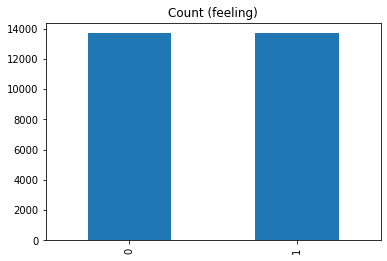

In [64]:

data_0 = data_reviews[data_reviews['feeling'] == 0]
data_1 = data_reviews[data_reviews['feeling'] == 1]

data_1_under = data_1.sample(feeling_0)
data_test_under = pd.concat([data_1_under, data_0], axis=0)

print('Random under-sampling:')
print(data_test_under.feeling.value_counts())

data_test_under.feeling.value_counts().plot(kind='bar', title='Count (feeling)');

In [67]:
data_test_under.shape

(27392, 2)

In [70]:
data_reviews_B = data_test_under
print(data_reviews_B.shape)
print(data_reviews_B.head())

(27392, 2)
                                               normalized  feeling
24112   provide part daily allowance fruit call thirty...        1
2983    item great make laundry detergent consists six...        1
74485   love annie product good chemical gmo laden tas...        1
135242  chia seed considered one super food add nutrib...        1
105740  nearly four year saw mcvitie brand available a...        1


Continuamos con el dataset balanceado.

### Train y test (Balanceado)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_reviews_B['normalized'],
    data_reviews_B['feeling'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [72]:
X_train.iloc[:10]

115330    yes lot expensive white sugar much better bett...
92351     bag say pecan halves half intact broken want d...
136423    wanted try kale chip strongly promoted cook he...
123688    thought like blech seemed harder spread tasted...
36391     almond good taste terrific covered seasoning e...
12287     purchased erin bakers becuase thought made tru...
7929      trail mix pretty good like spice good size goo...
102475    think many people would argue kind processed c...
55438     dandelion detox loose leaf tea great poor live...
32010     tea fantastic strong find need le recommend li...
Name: normalized, dtype: object

In [73]:
y_train.iloc[:10]

115330    1
92351     0
136423    0
123688    0
36391     1
12287     0
7929      1
102475    1
55438     1
32010     1
Name: feeling, dtype: int64

### Features

In [74]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer(
    max_df=0.95,  # Eliminamos el 5% de los tokens más frecuentes
    min_df=5, # Descartamos los tokens que no aparezcan al menos 5 veces
    max_features=3000, # Elección de nuestro vocabulario
    strip_accents='ascii',
    ngram_range=(1, 1)  #bigramas y trigramas  #Nos quedamos con palabras, funciona mejor el modelo.
)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=3000, min_df=5, strip_accents='ascii')

Con palabras el modelo funciona mejor que con bigramas y trigramas.

In [75]:
print(list(cv.vocabulary_.items())[:20])

[('yes', 2983), ('lot', 1549), ('expensive', 919), ('white', 2929), ('sugar', 2580), ('much', 1707), ('better', 241), ('tasting', 2655), ('baking', 188), ('made', 1569), ('normal', 1762), ('baked', 185), ('good', 1141), ('gluten', 1127), ('free', 1064), ('taste', 2648), ('original', 1832), ('nestle', 1739), ('chocolate', 462), ('chip', 457)]


In [76]:
print(len(cv.vocabulary_))

3000


### Scores TD-IDF

In [77]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

### Chi-cuadrado score

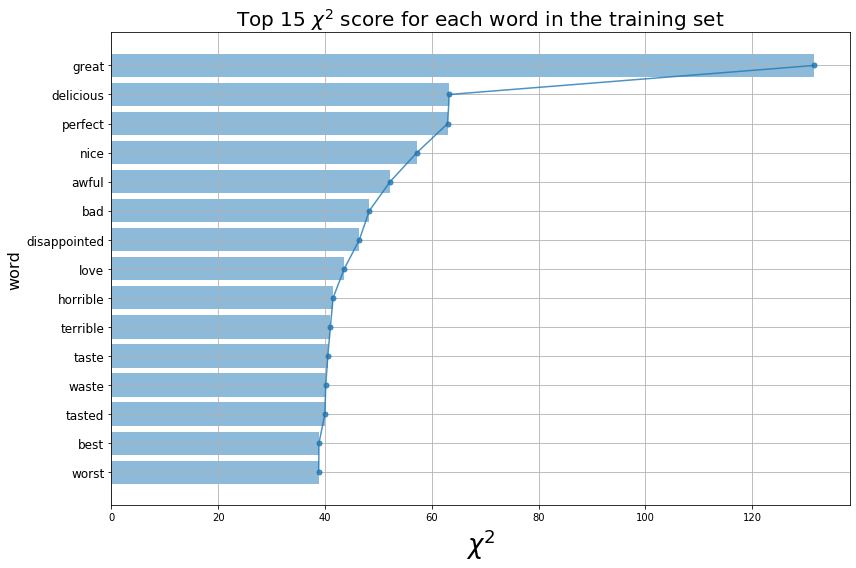

In [78]:
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
# Compute the chi-squared score for each word in the training set and show the values
i = 15

chi2score = chi2(X_train_, y_train)[0]
scores = list(zip(cv.get_feature_names(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

### Entrenamiento para Regresión Logística (Balanceado)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.797751168224299
Accuracy for C=0.05: 0.8097254672897196
Accuracy for C=0.25: 0.828125
Accuracy for C=0.5: 0.834696261682243
Accuracy for C=1: 0.838054906542056
Accuracy for C=10: 0.8278329439252337
Accuracy for C=100: 0.8146904205607477
Accuracy for C=1000: 0.8076810747663551
Accuracy for C=10000: 0.8073890186915887


In [80]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[2751  649]
 [ 670 2778]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3400
           1       0.81      0.81      0.81      3448

    accuracy                           0.81      6848
   macro avg       0.81      0.81      0.81      6848
weighted avg       0.81      0.81      0.81      6848

Accuracy score:0.8073890186915887


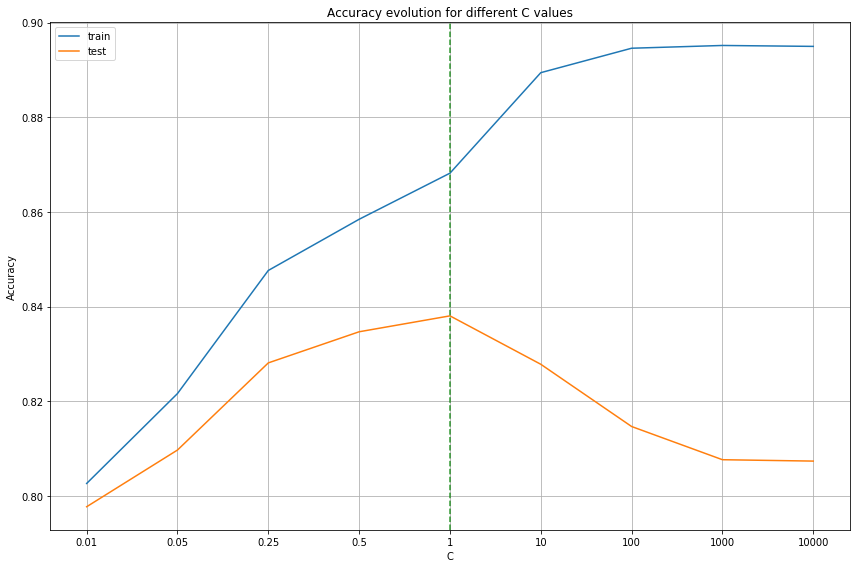

In [81]:
import numpy as np

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [87]:
def predict_review_sentiment_B(review_index, model):
    print('Actual sentiment: {}'.format(data_reviews_B.iloc[review_index]['feeling']))
    r = data_reviews_B.iloc[review_index]['normalized']
    print('Prediction: {}'.format(lr.predict(cv.transform([r]))))

In [88]:
import random

for i in random.sample(range(0, len(data_reviews_B)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment_B(i, lr)


Review no. 3809
Actual sentiment: 1
Prediction: [1]

Review no. 27165
Actual sentiment: 0
Prediction: [0]

Review no. 6562
Actual sentiment: 1
Prediction: [0]

Review no. 27352
Actual sentiment: 0
Prediction: [0]

Review no. 23456
Actual sentiment: 0
Prediction: [0]


A modo de prueba, probamos el mismo entrenamiento sin balancear.

### Train y test (Desbalanceado)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_reviews['normalized'],
    data_reviews['feeling'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [90]:
X_train.iloc[:10]

118372    flavor crispness eat vegetables sea salt veggi...
35089     really wonderful product smell taste like fres...
128192    nice smooth taste enjoyed coffee like way cup ...
94677     time boil potato great around thirty-four inst...
19684     love spaghetti find fail safe overcooked get m...
20636     use chai pacific chai vanilla latte mix coffee...
31944     hold non decaf course pretty decent certainly ...
116326    first coffee tried got keurig disappointed fla...
117994    tea nice sweet taste quite juice like sweetnes...
25475     snacker since childhood like idea individual b...
Name: normalized, dtype: object

In [91]:
y_train.iloc[:10]

118372    1
35089     1
128192    1
94677     1
19684     1
20636     1
31944     1
116326    0
117994    1
25475     1
Name: feeling, dtype: int64

### Features

In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    max_features=3000,
    strip_accents='ascii',
    ngram_range=(1, 1)  #bigramas y trigramas
)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=3000, min_df=5, strip_accents='ascii')

In [93]:
print(list(cv.vocabulary_.items())[:20])

[('flavor', 1021), ('eat', 832), ('sea', 2295), ('salt', 2256), ('veggie', 2857), ('chips', 474), ('reminds', 2178), ('sun', 2596), ('leave', 1493), ('oily', 1817), ('feel', 977), ('mouth', 1714), ('thirty', 2708), ('five', 1013), ('vitamin', 2872), ('four', 1061), ('two', 2811), ('calcium', 368), ('iron', 1390), ('many', 1599)]


In [94]:
print(len(cv.vocabulary_))

3000


### Score TD-IDF

In [95]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

### Chi-cuadrado score

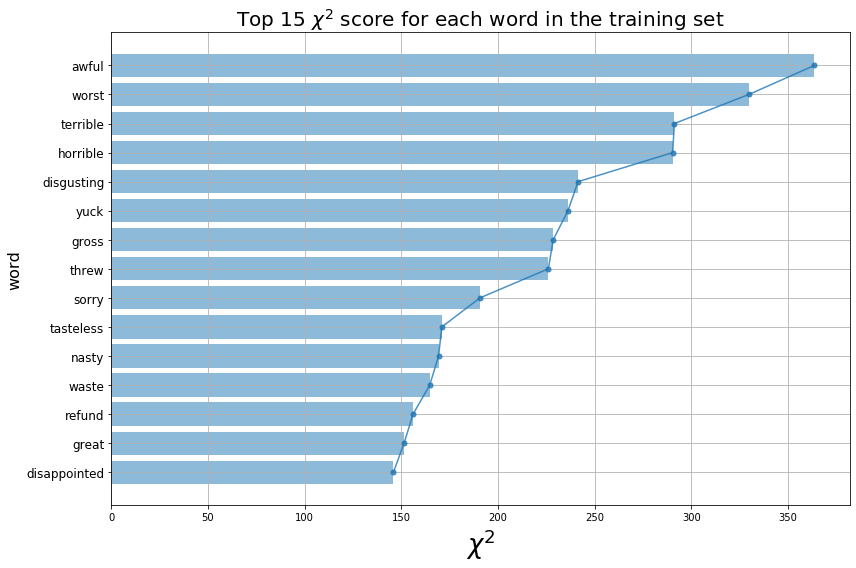

In [96]:
i = 15

chi2score = chi2(X_train_, y_train)[0]
scores = list(zip(cv.get_feature_names(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

### Entrenamiento para Regresión Logística (Desbalanceado)


In [97]:
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.9107737874861163
Accuracy for C=0.05: 0.9128100703443169
Accuracy for C=0.25: 0.9246310890146506
Accuracy for C=0.5: 0.927540064526366
Accuracy for C=1: 0.9293647855291691
Accuracy for C=10: 0.9300259163272862


/Users/jotaemeguzman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=100: 0.9293383402972444


/Users/jotaemeguzman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=1000: 0.9293118950653197
Accuracy for C=10000: 0.929206114137621


/Users/jotaemeguzman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [98]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[ 1450  1924]
 [  753 33687]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.43      0.52      3374
           1       0.95      0.98      0.96     34440

    accuracy                           0.93     37814
   macro avg       0.80      0.70      0.74     37814
weighted avg       0.92      0.93      0.92     37814

Accuracy score:0.929206114137621


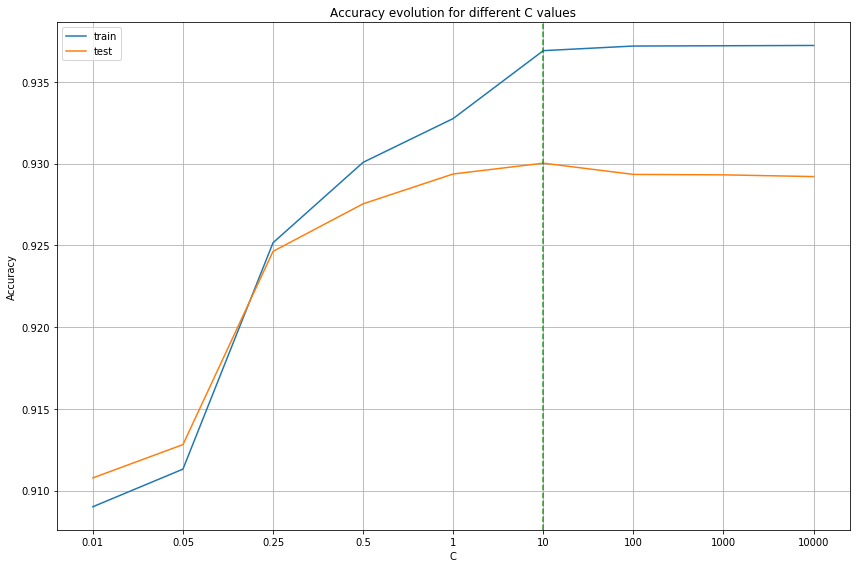

In [99]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [100]:
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(data_reviews.iloc[review_index]['feeling']))
    r = data_reviews.iloc[review_index]['normalized']
    print('Prediction: {}'.format(lr.predict(cv.transform([r]))))

In [101]:
for i in random.sample(range(0, len(data_reviews)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)


Review no. 116448
Actual sentiment: 1
Prediction: [0]

Review no. 24787
Actual sentiment: 1
Prediction: [1]

Review no. 7502
Actual sentiment: 0
Prediction: [1]

Review no. 14903
Actual sentiment: 1
Prediction: [1]

Review no. 48394
Actual sentiment: 1
Prediction: [1]


### VADER (Balanceado)

In [84]:
!pip install vaderSentiment

You should consider upgrading via the '/Users/jotaemeguzman/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [102]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df_vader = SentimentIntensityAnalyzer()

review_test = data_reviews_B[data_reviews_B['feeling']==1].sample(1)['normalized'].values[0]
print(review_test)
print(df_vader.polarity_scores(review_test))

order give proper review werther original caramels thought try recipe caramel apple package really much recipe whole package caramel plus two milk zap microwave caramel delicious creamy melted quickly candy apple turned great package say caramel made fresh butter real cream tell delicious highly recommended cheap
{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.9531}


### VADER (Desbalanceado)

In [103]:
df_vader = SentimentIntensityAnalyzer()

review_test = data_reviews[data_reviews['feeling']==1].sample(1)['normalized'].values[0]
print(review_test)
print(df_vader.polarity_scores(review_test))

brown gold one hundred ethiopian make delicious cup coffee like mine strong bitter disappoint one hundred ethiopian bold creamy without burnt taste strong coffee guaranteed wake faint heart casual coffee sipper mean business love
{'neg': 0.15, 'neu': 0.44, 'pos': 0.409, 'compound': 0.9337}
